In [1]:
import memilio.simulation.secir as secir
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime, date
import time
import seaborn as sns
plt.style.use("seaborn")


In [2]:
from utils_SA import simulate_model, generate_output_daywise

In [3]:
# openturns libraries

from __future__ import print_function
import openturns as ot
import openturns.viewer as viewer
ot.Log.Show(ot.Log.NONE)

import pickle

In [4]:
# Define Comartment names
compartments = ['Susceptible', 'Exposed', 'Carrier', 'Infected', 'Hospitalized', 'ICU', 'Recovered', 'Dead']
# Define age Groups
groups = ['0-4', '5-14', '15-34', '35-59', '60-79', '80+']

In [5]:
with open('Studies/study_infected_sobol.pkl', 'rb') as f:
    size = pickle.load(f)
    input_factor_names = pickle.load(f)
    distributions = pickle.load(f) # saved as coll (collection of distributions)
    static_params = pickle.load(f)
    inputDesign = pickle.load(f)
    sim_out = pickle.load(f)

In [6]:
aggregation_function = "max"

if aggregation_function == "max":
    output_agg = np.max(sim_out, axis = 1, keepdims = True)
elif aggregation_function == "sum":
    output_agg = np.sum(sim_out, axis = 1, keepdims=True)
elif aggregation_function == "mean":
    output_agg = np.mean(sim_out, axis = 1, keepdims=True)

In [7]:
sim_out.shape

(68000, 101)

In [8]:
output_agg.shape

(68000, 1)

In [9]:
outputDesign = ot.Sample(output_agg)
sensitivityAnalysis = ot.SaltelliSensitivityAlgorithm(inputDesign, outputDesign, size)

In [10]:
agg_first_order = sensitivityAnalysis.getAggregatedFirstOrderIndices()
agg_total_order = sensitivityAnalysis.getAggregatedTotalOrderIndices()
print("Agg. first order indices: ", agg_first_order)
print("Agg. total order indices: ", agg_total_order)

Agg. first order indices:  [0.482953,0.0189628,-0.0181157,0.133209,-0.0181727,-0.0181069,-0.0181111,-0.0181764,-0.0181709,-0.0181727,-0.0181555,-0.0181109,-0.0181696,-0.0181772,-0.0181032,-0.018192,-0.0181022,-0.0181755,-0.0181651,-0.0181648,-0.0181724,-0.0181727,-0.0181743,-0.0181737,-0.0181714,-0.0181696,-0.0181727,-0.0181727,-0.0181727,-0.0215804,-0.0137218,0.0631826,0.0568085,-0.0177601,-0.0181787,-0.0180713,-0.0178519,-0.0187496,-0.0180455,-0.0183603,-0.0180839,-0.0181212,-0.01818,-0.0181452,-0.0181316,-0.0181749,-0.0181879,-0.0181641,-0.0181239,-0.0181713,-0.0181735,-0.0181728,-0.0181718,-0.0181761,-0.0181721,-0.0181717,-0.0181732,-0.0181726,-0.0181741,0.0272711,-0.0110168,-0.0189703,-0.018173,-0.0181755,-0.0181425,-0.0181711]#66
Agg. total order indices:  [0.652606,0.0450465,0.000217302,0.257629,-1.71527e-09,9.17756e-05,6.9637e-06,-2.94602e-06,4.91562e-07,-1.18427e-08,-1.70748e-05,7.28043e-05,2.49172e-05,-8.08548e-06,0.000320572,0.000561253,-5.9593e-05,-1.07938e-05,8.6456e-06,-4

In [11]:
first_order = sensitivityAnalysis.getFirstOrderIndices()
total_order = sensitivityAnalysis.getTotalOrderIndices()
print("First order indices: ", first_order)
print("Total order indices: ", total_order)

First order indices:  [0.482953,0.0189628,-0.0181157,0.133209,-0.0181727,-0.0181069,-0.0181111,-0.0181764,-0.0181709,-0.0181727,-0.0181555,-0.0181109,-0.0181696,-0.0181772,-0.0181032,-0.018192,-0.0181022,-0.0181755,-0.0181651,-0.0181648,-0.0181724,-0.0181727,-0.0181743,-0.0181737,-0.0181714,-0.0181696,-0.0181727,-0.0181727,-0.0181727,-0.0215804,-0.0137218,0.0631826,0.0568085,-0.0177601,-0.0181787,-0.0180713,-0.0178519,-0.0187496,-0.0180455,-0.0183603,-0.0180839,-0.0181212,-0.01818,-0.0181452,-0.0181316,-0.0181749,-0.0181879,-0.0181641,-0.0181239,-0.0181713,-0.0181735,-0.0181728,-0.0181718,-0.0181761,-0.0181721,-0.0181717,-0.0181732,-0.0181726,-0.0181741,0.0272711,-0.0110168,-0.0189703,-0.018173,-0.0181755,-0.0181425,-0.0181711]#66
Total order indices:  [0.652606,0.0450465,0.000217302,0.257629,-1.71527e-09,9.17756e-05,6.9637e-06,-2.94602e-06,4.91562e-07,-1.18427e-08,-1.70748e-05,7.28043e-05,2.49172e-05,-8.08548e-06,0.000320572,0.000561253,-5.9593e-05,-1.07938e-05,8.6456e-06,-4.07502e-06

# Display distribution of samples

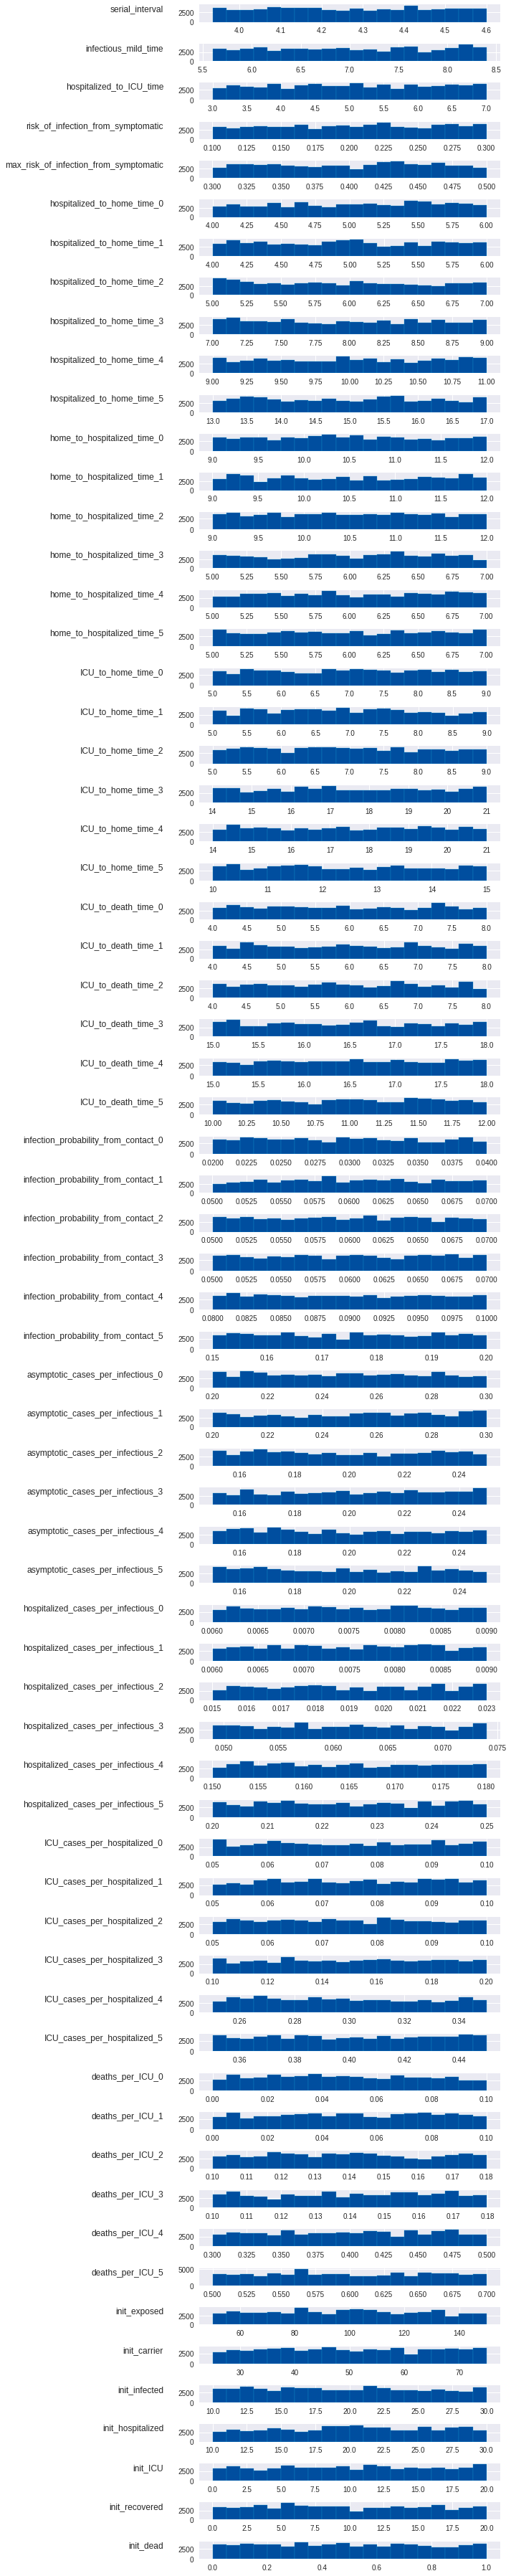

In [12]:
n = len(distributions)
n_bins = 20
fig, axes = plt.subplots(n, 1, figsize=(10, 50))
inputArray = np.array(inputDesign)

for i in range(n):
    axes[i].hist(inputArray[:, i], bins = n_bins, facecolor = '#004e9f', edgecolor = '#169acf')
    axes[i].set_ylabel(input_factor_names[i], rotation = 0, fontsize = 12, labelpad = 20, ha = 'right')
plt.tight_layout()
plt.show()

In [13]:
outputArray = np.array(sim_out)
outputArray.shape

(68000, 101)

In [14]:
out_end = outputArray[:, -1]
out_end.shape

(68000,)

In [15]:
import scipy.stats

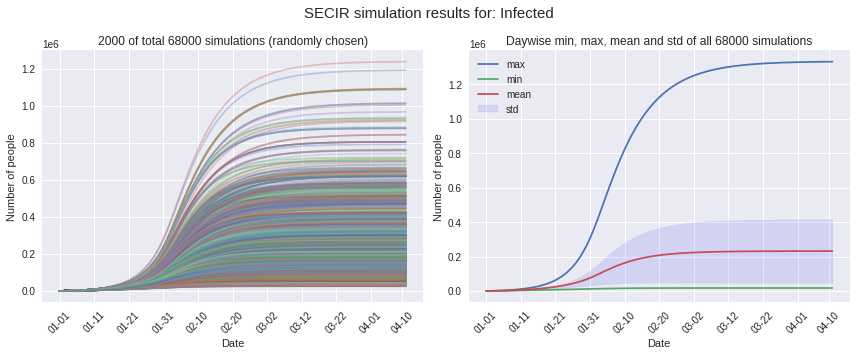

In [32]:
n_outputs = 2000
conf = 0.95

randidx = np.sort(np.random.randint(0, outputArray.shape[0], n_outputs))
#print(randidx)

title = f"SECIR simulation results for: {compartments[static_params['output_index'][0]]}"

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5), tight_layout = True)
fig.suptitle(title, fontsize = 15)

num_time_points = static_params['days'] + 1

data = outputArray[randidx, :]
x = np.arange(num_time_points)

days = static_params['days']
start_day = 1
start_month = 1
start_year = 2019

cum_sum = True

# Plot Results
datelist = np.array(
    pd.date_range(
        datetime(start_year, start_month, start_day),
        periods=days, freq='D').strftime('%m-%d').tolist())

tick_range = (np.arange(int(days / 10) + 1) * 10)
tick_range[-1] -= 1


for i in range(n_outputs):
    if cum_sum:
        axs[0].plot(x, np.cumsum(data[i, :]), alpha=0.3 )
    else:
        axs[0].plot(x, (data[i, :]), alpha=0.3 )

axs[0].set_title(f"{n_outputs} of total {len(outputArray)} simulations (randomly chosen)")

mean_result = np.array([np.mean(outputArray[:, i]) for i in range(num_time_points)])
#n = len(data)
#ci_result = np.array([scipy.stats.sem(data[:, i]) * scipy.stats.t.ppf((1+conf)/2., n-1) for i in range(num_time_points)])
std_result = np.array([np.std(outputArray[:, i]) for i in range(num_time_points)])

min_result = np.array([np.min(outputArray[:, i]) for i in range(num_time_points)])
max_result = np.array([np.max(outputArray[:, i]) for i in range(num_time_points)])    

if cum_sum:
    mean_result = np.cumsum(mean_result)
    std_result = np.cumsum(std_result)
    min_result = np.cumsum(min_result)
    max_result = np.cumsum(max_result)

axs[1].plot(x, max_result, label = 'max')
axs[1].plot(x, min_result, label = "min")
axs[1].plot(x, mean_result, label = 'mean')
axs[1].fill_between(x, 
                    (mean_result - std_result), (mean_result + std_result), 
                    color = 'b', alpha = .1, label = "std")

#axs[1].fill_between(x, (mean_result - ci_result), (mean_result + ci_result), color = 'b', alpha = .1)
#axs[1].set_title(f"Daywise mean with {conf} confidence interval.")
axs[1].set_title(f"Daywise min, max, mean and std of all {len(outputArray)} simulations")
axs[1].legend()

for j in range(2):
    axs[j].set_xticks(tick_range)
    axs[j].set_xticklabels(datelist[tick_range], rotation=45)
    axs[j].set(ylabel = "Number of people", xlabel = "Date")

plt.show()

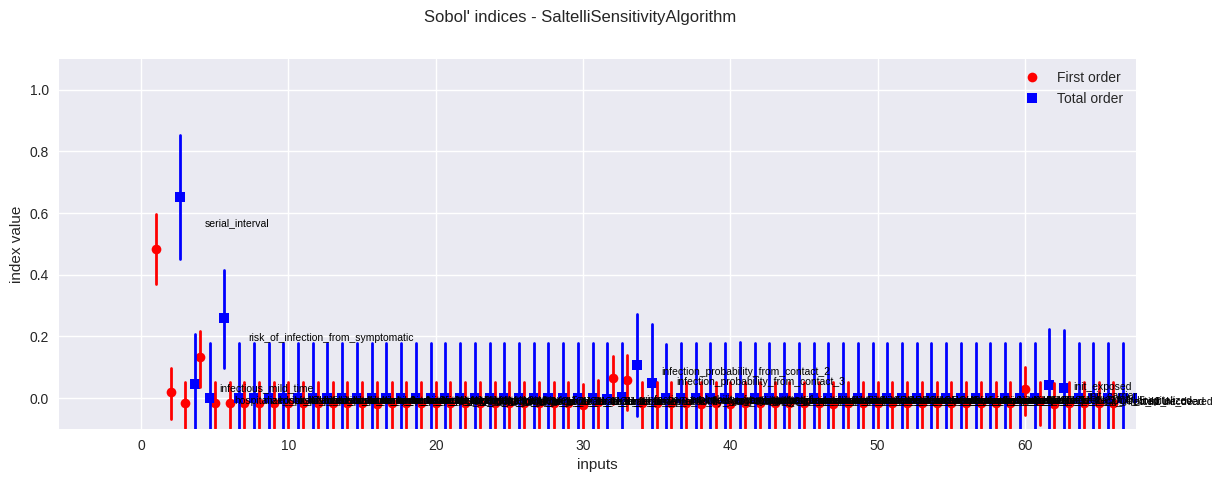

In [18]:
graph = sensitivityAnalysis.draw()
view = viewer.View(graph, (1400, 500))

In [19]:
print(sensitivityAnalysis.getConfidenceLevel())

0.95


In [20]:
firstCI = sensitivityAnalysis.getFirstOrderIndicesInterval()
totalCI = sensitivityAnalysis.getTotalOrderIndicesInterval()
total = np.array(sensitivityAnalysis.getAggregatedTotalOrderIndices())
first = np.array(sensitivityAnalysis.getAggregatedFirstOrderIndices())

In [21]:
sorted_ids = list(map(int, np.argsort(total)))
print(sorted_ids)
type(sorted_ids[0])

[29, 33, 37, 34, 35, 42, 16, 64, 10, 45, 17, 13, 19, 7, 48, 25, 54, 20, 50, 49, 26, 57, 55, 28, 51, 27, 9, 4, 21, 56, 8, 24, 65, 53, 6, 23, 18, 43, 46, 12, 52, 58, 22, 36, 11, 44, 39, 5, 62, 63, 41, 47, 2, 61, 14, 40, 15, 38, 30, 60, 59, 1, 32, 31, 3, 0]


int

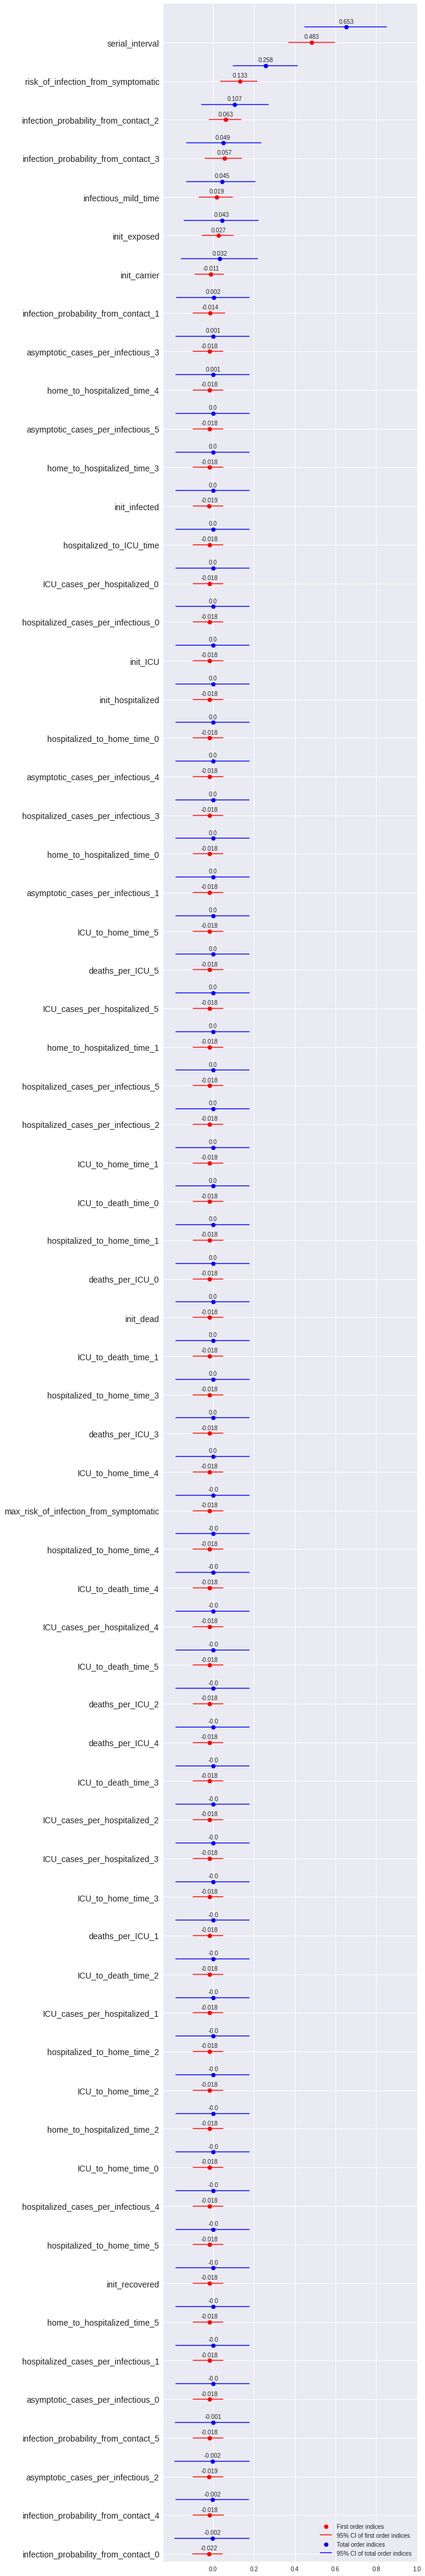

In [25]:
sorted_ids = list(map(int, np.argsort(total)))
n = len(distributions)
alp = 0.7
lw = 2
fig, axes = plt.subplots(1, 1, figsize=(10, 60))
inputArray = np.array(inputDesign)
x = np.arange(0, 1.1, 0.2)
y = np.arange(0, len(first), 1)
space = 0.4
y2 = np.arange(0+space, len(total)+space, 1)


axes.scatter(first[sorted_ids], y, label = "First order indices", c = 'red')
plt.hlines(y=0, xmin=0, xmax=0, 
               colors='red', linestyles='-', lw=lw, label = "95% CI of first order indices", alpha = alp)
axes.scatter(total[sorted_ids], y2, label = "Total order indices", c = 'blue')
plt.hlines(y=0, xmin=0, xmax=0, 
               colors='blue', linestyles='-', lw=lw, label = "95% CI of total order indices", alpha = alp)
for i, j in enumerate(sorted_ids):
    plt.hlines(y=y[i], xmin=firstCI.getMarginal(j).getLowerBound()[0], 
               xmax=firstCI.getMarginal(j).getUpperBound()[0], 
               colors='red', linestyles='-', lw=lw, alpha = alp)
    plt.hlines(y=y2[i], xmin=totalCI.getMarginal(j).getLowerBound()[0], 
               xmax=totalCI.getMarginal(j).getUpperBound()[0], 
               colors='blue', linestyles='-', lw=lw, alpha = alp)
    plt.annotate(str(np.round(first[sorted_ids[i]], 3)), (first[sorted_ids[i]], y[i]+ 0.25*space), ha='center')
    plt.annotate(str(np.round(total[sorted_ids[i]], 3)), (total[sorted_ids[i]], y2[i]+ 0.25*space), ha='center')
    

#axes.set_ylabel(input_factor_names[i], rotation = 0, fontsize = 12, labelpad = 20, ha = 'right')
axes.set_xticks(x)
axes.set_yticks(y)
axes.set_yticklabels([input_factor_names[k] for k in sorted_ids], fontsize = 14)
plt.legend(loc='lower right')
plt.ylim([-0.2, n])
#plt.xlim([-0.1, 1])
plt.tight_layout()
plt.show()

In [26]:
eps = 1e-3

relevant = total[total > eps]
print(relevant)
#print(np.sort(total))
print(len(total), len(relevant))

sorted_ids = list(map(int, np.argsort(total)))
print(sorted_ids)
sorted_ids = sorted_ids[-len(relevant):]
print(sorted_ids)

[0.65260602 0.04504649 0.25762876 0.00243749 0.10713686 0.04872347
 0.04327064 0.0318038 ]
66 8
[29, 33, 37, 34, 35, 42, 16, 64, 10, 45, 17, 13, 19, 7, 48, 25, 54, 20, 50, 49, 26, 57, 55, 28, 51, 27, 9, 4, 21, 56, 8, 24, 65, 53, 6, 23, 18, 43, 46, 12, 52, 58, 22, 36, 11, 44, 39, 5, 62, 63, 41, 47, 2, 61, 14, 40, 15, 38, 30, 60, 59, 1, 32, 31, 3, 0]
[30, 60, 59, 1, 32, 31, 3, 0]


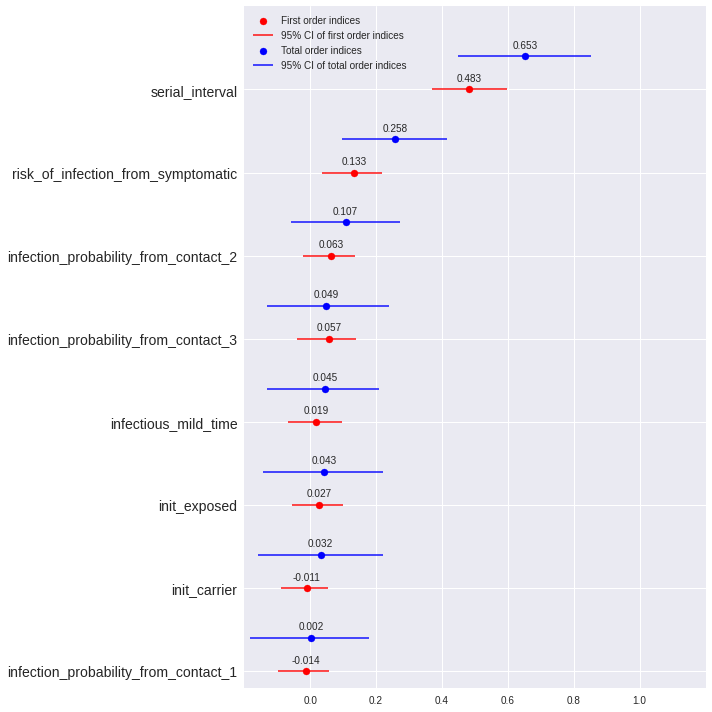

In [28]:
n = len(distributions)
alp = 0.7
lw = 2
fig, axes = plt.subplots(1, 1, figsize=(10, 10))
inputArray = np.array(inputDesign)
x = np.arange(0, 1.1, 0.2)
y = np.arange(0, len(sorted_ids), 1)
space = 0.4
y2 = np.arange(0+space, len(sorted_ids)+space, 1)


axes.scatter(first[sorted_ids], y, label = "First order indices", c = 'red')
plt.hlines(y=0, xmin=0, xmax=0, 
               colors='red', linestyles='-', lw=lw, label = "95% CI of first order indices", alpha = alp)
axes.scatter(total[sorted_ids], y2, label = "Total order indices", c = 'blue')
plt.hlines(y=0, xmin=0, xmax=0, 
               colors='blue', linestyles='-', lw=lw, label = "95% CI of total order indices", alpha = alp)
for i, j in enumerate(sorted_ids):
    plt.hlines(y=y[i], xmin=firstCI.getMarginal(j).getLowerBound()[0], 
               xmax=firstCI.getMarginal(j).getUpperBound()[0], 
               colors='red', linestyles='-', lw=lw, alpha = alp)
    plt.hlines(y=y2[i], xmin=totalCI.getMarginal(j).getLowerBound()[0], 
               xmax=totalCI.getMarginal(j).getUpperBound()[0], 
               colors='blue', linestyles='-', lw=lw, alpha = alp)
    plt.annotate(str(np.round(first[sorted_ids[i]], 3)), (first[sorted_ids[i]], y[i]+ 0.25*space), ha='center')
    plt.annotate(str(np.round(total[sorted_ids[i]], 3)), (total[sorted_ids[i]], y2[i]+ 0.25*space), ha='center')
    

#axes.set_ylabel(input_factor_names[i], rotation = 0, fontsize = 12, labelpad = 20, ha = 'right')
axes.set_xticks(x)
axes.set_yticks(y)
axes.set_yticklabels([input_factor_names[k] for k in sorted_ids], fontsize = 14)
plt.legend(loc='upper left')
plt.ylim([-0.2, len(sorted_ids)])
plt.xlim([-0.2, 1.2])
plt.tight_layout()
plt.show()